In [ ]:
pip show torch matplotlib numpy

Name: torch
Version: 2.2.1+cpu
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: d:\anaconda\Lib\site-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: torchaudio, torchdata, torchtext, torchvision
---
Name: matplotlib
Version: 3.9.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: Unknown <matplotlib-users@python.org>
License: License agreement for matplotlib versions 1.3.0 and later

1. This LICENSE AGREEMENT is between the Matplotlib Development Team
("MDT"), and the Individual or Organization ("Licensee") accessing and
otherwise using matplotlib software in source or binary form and its
associated documentation.

2. Subject to the terms and conditions of this License Agreement, MDT
hereby grants Licensee a nonexclusive, r

In [ ]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

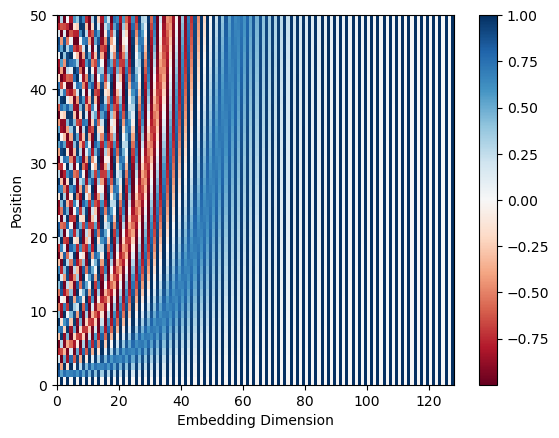

In [ ]:
# 위치 인코딩

import math
import torch
from torch import nn
from matplotlib import pyplot as plt

class PositionalEncoding(nn.Module): #입력 : 임베딩 차원(d_model), 최대 시퀀스(max_len)
    def __init__(self, d_model, max_len, dropout=0.1):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(
            torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model)
        )

        pe = torch.zeros(max_len, 1, d_model)
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        self.register_buffer("pe", pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0)]
        return self.dropout(x)

# 인코딩 시각화
encoding = PositionalEncoding(d_model=128, max_len=50)
plt.pcolormesh(encoding.pe.detach().numpy().squeeze(), cmap="RdBu")
plt.xlabel("Embedding Dimension")
plt.xlim((0, 128))
plt.ylabel("Position")
plt.colorbar()
plt.show()


In [ ]:
pip install spacy

  Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl (12.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.6 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.


In [ ]:
!pip uninstall numpy -y
!pip install numpy==1.26.4

Found existing installation: numpy 2.2.6
Uninstalling numpy-2.2.6:
  Successfully uninstalled numpy-2.2.6


You can safely remove it manually.
You can safely remove it manually.


  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
!python -m spacy download de_core_news_sm
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
     -- ------------------------------------- 1.0/14.6 MB 6.3 MB/s eta 0:00:03
     ------ --------------------------------- 2.4/14.6 MB 6.1 MB/s eta 0:00:03
     ---------- ----------------------------- 3.7/14.6 MB 5.9 MB/s eta 0:00:02
     ------------- -------------------------- 5.0/14.6 MB 6.0 MB/s eta 0:00:02
     ---------------- ----------------------- 6.0/14.6 MB 5.8 MB/s eta 0:00:02
     -------------------- ------------------- 7.3/14.6 MB 5.9 MB/s eta 0:00:02
     ----------------------- ---------------- 8.7/14.6 MB 5.8 MB/s eta 0:00:02
     --------------------------- ------------ 10.0/14.6 MB 5.9 MB/s eta 0:00:01
     ------------------------------ --------- 11.3/14.6 MB 5.9 MB/s eta 0:00:01
     --------------------------------- ------ 12.3/14.6 MB 5.9 MB/s eta 0:00:01
     ------------------------------------- -- 13.6/14.6 MB 5.9 MB/s eta 0:00:01
     ---------------------------------------- 14.6/14.6

In [ ]:
# 데이터세트 다운로드 및 전처리


from torchtext.datasets import Multi30k
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

def generate_tokens(text_iter, language):
    language_index = {SRC_LANGUAGE: 0, TGT_LANGUAGE: 1}

    for text in text_iter:
        yield token_transform[language](text[language_index[language]])

SRC_LANGUAGE = "de"
TGT_LANGUAGE = "en"

BOS_IDX = vocab_transform[TGT_LANGUAGE]["<bos>"]
EOS_IDX = vocab_transform[TGT_LANGUAGE]["<eos>"]
PAD_IDX = vocab_transform[TGT_LANGUAGE]["<pad>"]
UNK_IDX = vocab_transform[TGT_LANGUAGE]["<unk>"]

special_symbols = ["<unk>", "<pad>", "<bos>", "<eos>"]

token_transform = {
    SRC_LANGUAGE: get_tokenizer("spacy", language="de_core_news_sm"),
    TGT_LANGUAGE: get_tokenizer("spacy", language="en_core_web_sm"),
}

print("Token Transform:")
print(token_transform)

vocab_transform = {}
for language in [SRC_LANGUAGE, TGT_LANGUAGE]:
    train_iter = Multi30k(split="train", language_pair=(SRC_LANGUAGE, TGT_LANGUAGE))
    vocab_transform[language] = build_vocab_from_iterator(
        generate_tokens(train_iter, language),
        min_freq=1,
        specials=special_symbols,
        special_first=True,
    )

for language in [SRC_LANGUAGE, TGT_LANGUAGE]:
    vocab_transform[language].set_default_index(UNK_IDX)

print("Vocab Transform:")
print(vocab_transform)


Token Transform:
{'de': functools.partial(<function _spacy_tokenize at 0x000001B00F831580>, spacy=<spacy.lang.de.German object at 0x000001B04A01C920>), 'en': functools.partial(<function _spacy_tokenize at 0x000001B00F831580>, spacy=<spacy.lang.en.English object at 0x000001B049FE4D10>)}
Vocab Transform:
{'de': Vocab(), 'en': Vocab()}


In [ ]:
# 트랜스포머 모델 구성

import math
import torch
from torch import nn

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len, dropout=0.1):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(
            torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model)
        )
        pe = torch.zeros(max_len, 1, d_model)
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        self.register_buffer("pe", pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0)]
        return self.dropout(x)

class TokenEmbedding(nn.Module):
    def __init__(self, vocab_size, emb_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, emb_size)
        self.emb_size = emb_size

    def forward(self, tokens):
        return self.embedding(tokens.long()) * math.sqrt(self.emb_size)

class Seq2SeqTransformer(nn.Module):
    def __init__(
        self,
        num_encoder_layers,
        num_decoder_layers,
        emb_size,
        max_len,
        nhead,
        src_vocab_size,
        tgt_vocab_size,
        dim_feedforward,
        dropout=0.1,
    ):
        super().__init__()
        self.src_tok_emb = TokenEmbedding(src_vocab_size, emb_size)
        self.tgt_tok_emb = TokenEmbedding(tgt_vocab_size, emb_size)
        self.positional_encoding = PositionalEncoding(
            d_model=emb_size, max_len=max_len, dropout=dropout
        )

        self.transformer = nn.Transformer(
            d_model=emb_size,
            nhead=nhead,
            num_encoder_layers=num_encoder_layers,
            num_decoder_layers=num_decoder_layers,
            dim_feedforward=dim_feedforward,
            dropout=dropout,
        )
        self.generator = nn.Linear(emb_size, tgt_vocab_size)

    def forward(
        self,
        src,
        trg,
        src_mask,
        tgt_mask,
        src_padding_mask,
        tgt_padding_mask,
        memory_key_padding_mask,
    ):
        src_emb = self.positional_encoding(self.src_tok_emb(src))
        tgt_emb = self.positional_encoding(self.tgt_tok_emb(trg))
        outs = self.transformer(
            src=src_emb,
            tgt=tgt_emb,
            src_mask=src_mask,
            tgt_mask=tgt_mask,
            memory_mask=None,
            src_key_padding_mask=src_padding_mask,
            tgt_key_padding_mask=tgt_padding_mask,
            memory_key_padding_mask=memory_key_padding_mask,
        )
        return self.generator(outs)

    def encode(self, src, src_mask):
        return self.transformer.encoder(
            self.positional_encoding(self.src_tok_emb(src)), src_mask
        )

    def decode(self, tgt, memory, tgt_mask):
        return self.transformer.decoder(
            self.positional_encoding(self.tgt_tok_emb(tgt)), memory, tgt_mask
        )


In [ ]:
# 트랜스포머 모델 구조

from torch import optim

BATCH_SIZE = 32
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

model = Seq2SeqTransformer(
    num_encoder_layers=3,
    num_decoder_layers=3,
    emb_size=512,
    max_len=512,
    nhead=8,
    src_vocab_size=len(vocab_transform[SRC_LANGUAGE]),
    tgt_vocab_size=len(vocab_transform[TGT_LANGUAGE]),
    dim_feedforward=512,
).to(DEVICE)

criterion = nn.CrossEntropyLoss(ignore_index=PAD_IDX).to(DEVICE)
optimizer = optim.Adam(model.parameters())

for main_name, main_module in model.named_children():
    print(main_name)
    for sub_name, sub_module in main_module.named_children():
        print("|  ", sub_name)
        for ssub_name, ssub_module in sub_module.named_children():
            print("|  |  ", ssub_name)
            for sssub_name, sssub_module in ssub_module.named_children():
                print("|  |  |  ", sssub_name)


d:\anaconda\Lib\site-packages\torch\nn\modules\transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


src_tok_emb
|   embedding
tgt_tok_emb
|   embedding
positional_encoding
|   dropout
transformer
|   encoder
|  |   layers
|  |  |   0
|  |  |   1
|  |  |   2
|  |   norm
|   decoder
|  |   layers
|  |  |   0
|  |  |   1
|  |  |   2
|  |   norm
generator


In [ ]:
# 배치 데이터 생성

from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

def sequential_transforms(*transforms):
    def func(txt_input):
        for transform in transforms:
            txt_input = transform(txt_input)
        return txt_input
    return func

def input_transform(token_ids):
    return torch.cat(
        (torch.tensor([BOS_IDX]), torch.tensor(token_ids), torch.tensor([EOS_IDX]))
    )

def collator(batch):
    src_batch, tgt_batch = [], []
    for src_sample, tgt_sample in batch:
        src_batch.append(text_transform[SRC_LANGUAGE](src_sample.rstrip("\n")))
        tgt_batch.append(text_transform[TGT_LANGUAGE](tgt_sample.rstrip("\n")))

    src_batch = pad_sequence(src_batch, padding_value=PAD_IDX)
    tgt_batch = pad_sequence(tgt_batch, padding_value=PAD_IDX)
    return src_batch, tgt_batch

text_transform = {}
for language in [SRC_LANGUAGE, TGT_LANGUAGE]:
    text_transform[language] = sequential_transforms(
        token_transform[language], vocab_transform[language], input_transform
    )

data_iter = Multi30k(split="valid", language_pair=(SRC_LANGUAGE, TGT_LANGUAGE))
dataloader = DataLoader(data_iter, batch_size=BATCH_SIZE, collate_fn=collator,num_workers=0)
source_tensor, target_tensor = next(iter(dataloader))

print("(source, target):")
print(next(iter(data_iter)))

print("source_batch:", source_tensor.shape)
print(source_tensor)

print("target_batch:", target_tensor.shape)
print(target_tensor)


(source, target):
('Eine Gruppe von Männern lädt Baumwolle auf einen Lastwagen', 'A group of men are loading cotton onto a truck')
source_batch: torch.Size([30, 32])
tensor([[    2,     2,     2,     2,     2,     2,     2,     2,     2,     2,
             2,     2,     2,     2,     2,     2,     2,     2,     2,     2,
             2,     2,     2,     2,     2,     2,     2,     2,     2,     2,
             2,     2],
        [   14,     5,     5,    21,     5,    14,     5,     5,     5,    14,
             5,    14,    60,    14,    14,    60,     5,    14,    14,    60,
             5,    17,     5,     5,   303,    21,     5,    60,    14,     5,
             5,    14],
        [   38,    12,    35,    31,    12,    17,   175,    75,    12,   755,
            69,    68,   114,    17,    17,    54,     0,    38,    85,    27,
          1268,     9,    12,   706,    53,   123,  7835,    31,    68,  1428,
           180,    68],
        [   24,   281,    10,   957,    10,     7, 

d:\anaconda\Lib\site-packages\torch\utils\data\datapipes\iter\combining.py:337: UserWarning: Some child DataPipes are not exhausted when __iter__ is called. We are resetting the buffer and each child DataPipe will read from the start again.
  warnings.warn("Some child DataPipes are not exhausted when __iter__ is called. We are resetting "


In [ ]:
# 어텐션 마스크 생성

def generate_square_subsequent_mask(s):
    mask = (torch.triu(torch.ones((s, s), device=DEVICE)) == 1).transpose(0, 1)
    mask = (
        mask.float()
        .masked_fill(mask == 0, float("-inf"))
        .masked_fill(mask == 1, float(0.0))
    )
    return mask

def create_mask(src, tgt):
    src_seq_len = src.shape[0]
    tgt_seq_len = tgt.shape[0]

    tgt_mask = generate_square_subsequent_mask(tgt_seq_len)
    src_mask = torch.zeros((src_seq_len, src_seq_len), device=DEVICE).type(torch.bool)

    src_padding_mask = (src == PAD_IDX).transpose(0, 1)
    tgt_padding_mask = (tgt == PAD_IDX).transpose(0, 1)
    return src_mask, tgt_mask, src_padding_mask, tgt_padding_mask

target_input = target_tensor[:-1, :]
target_out = target_tensor[1:, :]

source_mask, target_mask, source_padding_mask, target_padding_mask = create_mask(
    source_tensor, target_input
)

print("source_mask:", source_mask.shape)
print(source_mask)

print("target_mask:", target_mask.shape)
print(target_mask)

print("source_padding_mask:", source_padding_mask.shape)
print(source_padding_mask)

print("target_padding_mask:", target_padding_mask.shape)
print(target_padding_mask)


source_mask: torch.Size([30, 30])
tensor([[False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False],
        [False

In [ ]:
# 모델 학습 및 평가

def run(model, optimizer, criterion, split):
    model.train() if split == "train" else model.eval()
    data_iter = Multi30k(split=split, language_pair=(SRC_LANGUAGE, TGT_LANGUAGE))
    dataloader = DataLoader(data_iter, batch_size=BATCH_SIZE, collate_fn=collator)

    losses = 0
    for source_batch, target_batch in dataloader:
        source_batch = source_batch.to(DEVICE)
        target_batch = target_batch.to(DEVICE)

        target_input = target_batch[:-1, :]
        target_output = target_batch[1:, :]

        src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = create_mask(
            source_batch, target_input
        )

        logits = model(
            src=source_batch,
            trg=target_input,
            src_mask=src_mask,
            tgt_mask=tgt_mask,
            src_padding_mask=src_padding_mask,
            tgt_padding_mask=tgt_padding_mask,
            memory_key_padding_mask=src_padding_mask,
        )

        optimizer.zero_grad()
        loss = criterion(logits.reshape(-1, logits.shape[-1]), target_output.reshape(-1))
        if split == "train":
            loss.backward()
            optimizer.step()
        losses += loss.item()

    return losses / len(list(dataloader))

for epoch in range(5):
    train_loss = run(model, optimizer, criterion, "train")
    val_loss = run(model, optimizer, criterion, "valid")
    print(f"Epoch: {epoch+1}, Train loss: {train_loss:.3f}, Val loss: {val_loss:.3f}")


d:\anaconda\Lib\site-packages\torch\nn\functional.py:5109: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


Epoch: 1, Train loss: 5.261, Val loss: 5.085
Epoch: 2, Train loss: 5.431, Val loss: 5.700
Epoch: 3, Train loss: 5.388, Val loss: 7.551
Epoch: 4, Train loss: 5.288, Val loss: 8.662
Epoch: 5, Train loss: 5.226, Val loss: 8.874


In [ ]:
def greedy_decode(model, source_tensor, source_mask, max_len, start_symbol):
    source_tensor = source_tensor.to(DEVICE)
    source_mask = source_mask.to(DEVICE)

    memory = model.encode(source_tensor, source_mask)
    ys = torch.ones(1, 1).fill_(start_symbol).type(torch.long).to(DEVICE)
    for i in range(max_len - 1):
        memory = memory.to(DEVICE)
        target_mask = generate_square_subsequent_mask(ys.size(0))
        target_mask = target_mask.type(torch.bool).to(DEVICE)

        out = model.decode(memory, ys, target_mask)
        out = out.transpose(0, 1)
        prob = model.generator(out[:, -1])
        _, next_word = torch.max(prob, dim=1)
        next_word = next_word.item()

        ys = torch.cat(
            [ys, torch.ones(1, 1).type_as(source_tensor.data).fill_(next_word)], dim=0
        )

        if next_word == EOS_IDX:
            break
    return ys

def translate(model, source_sentence):
    model.eval()
    source_tensor = text_transform[SRC_LANGUAGE](source_sentence).view(-1, 1)
    num_tokens = source_tensor.shape[0]
    src_mask = (torch.zeros(num_tokens, num_tokens)).type(torch.bool)

    tgt_tokens = greedy_decode(
        model, source_tensor, src_mask, max_len=num_tokens + 5, start_symbol=BOS_IDX
    ).flatten()

    output = vocab_transform[TGT_LANGUAGE].lookup_tokens(list(tgt_tokens.cpu().numpy()))[1:-1]
    return " ".join(output)

output_oov = translate(model, "Eine Gruppe von Menschen steht vor einem Iglu .")
output = translate(model, "Eine Gruppe von Menschen steht vor einem Gebäude .")
print(output_oov)
print(output)


# GPT-2 실습

In [ ]:
from transformers import GPT2LMHeadModel

model = GPT2LMHeadModel.from_pretrained(pretrained_model_name_or_path="gpt2")

for main_name, main_module in model.named_children():
    print(main_name)
    for sub_name, sub_module in main_module.named_children():
        print("├──", sub_name)
        for ssub_name, ssub_module in sub_module.named_children():
            print("│   ├──", ssub_name)
            for sssub_name, sssub_module in ssub_module.named_children():
                print("│   │   └──", sssub_name)


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

d:\anaconda\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\최은우\.cache\huggingface\hub\models--gpt2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

transformer
├── wte
├── wpe
├── drop
├── h
│   ├── 0
│   │   └── ln_1
│   │   └── attn
│   │   └── ln_2
│   │   └── mlp
│   ├── 1
│   │   └── ln_1
│   │   └── attn
│   │   └── ln_2
│   │   └── mlp
│   ├── 2
│   │   └── ln_1
│   │   └── attn
│   │   └── ln_2
│   │   └── mlp
│   ├── 3
│   │   └── ln_1
│   │   └── attn
│   │   └── ln_2
│   │   └── mlp
│   ├── 4
│   │   └── ln_1
│   │   └── attn
│   │   └── ln_2
│   │   └── mlp
│   ├── 5
│   │   └── ln_1
│   │   └── attn
│   │   └── ln_2
│   │   └── mlp
│   ├── 6
│   │   └── ln_1
│   │   └── attn
│   │   └── ln_2
│   │   └── mlp
│   ├── 7
│   │   └── ln_1
│   │   └── attn
│   │   └── ln_2
│   │   └── mlp
│   ├── 8
│   │   └── ln_1
│   │   └── attn
│   │   └── ln_2
│   │   └── mlp
│   ├── 9
│   │   └── ln_1
│   │   └── attn
│   │   └── ln_2
│   │   └── mlp
│   ├── 10
│   │   └── ln_1
│   │   └── attn
│   │   └── ln_2
│   │   └── mlp
│   ├── 11
│   │   └── ln_1
│   │   └── attn
│   │   └── ln_2
│   │   └── mlp
├── ln_f
lm_head


In [ ]:
# gpt-2 를 이용한 문장 생성

from transformers import pipeline

generator = pipeline(task="text-generation", model="gpt2")
outputs = generator(
    text_inputs="Machine learning is",
    max_length=20,
    num_return_sequences=3,
    pad_token_id=generator.tokenizer.eos_token_id
)

print(outputs)


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Both `max_new_tokens` (=256) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': 'Machine learning is becoming more complex for computer scientists and engineers. The new techniques are becoming increasingly important for analyzing, and improving, complex data sets. And while many of these techniques may not work in practice, they are becoming a major part of AI research.\n\nImage: Getty Images\n\nThis is probably too good to be true. But the fact that a few well-known algorithms, such as Turing\'s, are being used to refine the process of classification of human knowledge in real time is one sign that the process is still evolving. This does not mean that machine learning is dead. But it has some new applications to give it more opportunities to be used in a variety of roles.\n\n"What I\'m seeing is that we are seeing a revolution in the way AI is used by the AI community," says Mark Dworkin, a postdoctoral researcher at Harvard University\'s Artificial Intelligence Lab. "You can see the future of computer science in this way."\n\nThe problem wi

In [ ]:
import torch
import torchtext
print(torch.__version__)
print(torchtext.__version__)


2.2.1+cpu
0.17.1+cpu


In [ ]:
# CoLA 데이터세트 불러오기

import torch
from torchtext.datasets import CoLA
from transformers import AutoTokenizer
from torch.utils.data import DataLoader

def collator(batch, tokenizer, device):
    source, labels, texts = zip(*batch)
    tokenized = tokenizer(
        texts,
        padding="longest",
        truncation=True,
        return_tensors="pt"
    )
    input_ids = tokenized["input_ids"].to(device)
    attention_mask = tokenized["attention_mask"].to(device)
    labels = torch.tensor(labels, dtype=torch.long).to(device)
    return input_ids, attention_mask, labels

train_data = list(CoLA(split="train"))
valid_data = list(CoLA(split="dev"))
test_data = list(CoLA(split="test"))

tokenizer = AutoTokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token

epochs = 3
batch_size = 16
device = "cuda" if torch.cuda.is_available() else "cpu"

train_dataloader = DataLoader(
    train_data,
    batch_size=batch_size,
    collate_fn=lambda x: collator(x, tokenizer, device),
    shuffle=True,
)

valid_dataloader = DataLoader(
    valid_data,
    batch_size=batch_size,
    collate_fn=lambda x: collator(x, tokenizer, device),
)

test_dataloader = DataLoader(
    test_data,
    batch_size=batch_size,
    collate_fn=lambda x: collator(x, tokenizer, device),
)

print("Train Dataset Length :", len(train_data))
print("Valid Dataset Length :", len(valid_data))
print("Test Dataset Length :", len(test_data))


d:\anaconda\Lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Train Dataset Length : 8550
Valid Dataset Length : 526
Test Dataset Length : 515


In [ ]:
# gpt-2 모델 설정

from torch import optim
from transformers import GPT2ForSequenceClassification

model = GPT2ForSequenceClassification.from_pretrained(
    pretrained_model_name_or_path="gpt2",
    num_labels=2
).to(device)

model.config.pad_token_id = model.config.eos_token_id

optimizer = optim.Adam(model.parameters(), lr=5e-5)


Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# gpt-2 모델 학습 및 검증

import numpy as np
from torch import nn

def calc_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

def train(model, optimizer, dataloader):
    model.train()
    train_loss = 0.0

    for input_ids, attention_mask, labels in dataloader:
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )

        loss = outputs.loss
        train_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss = train_loss / len(dataloader)
    return train_loss

def evaluation(model, dataloader):
    with torch.no_grad():
        model.eval()
        criterion = nn.CrossEntropyLoss()
        val_loss, val_accuracy = 0.0, 0.0

        for input_ids, attention_mask, labels in dataloader:
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                labels=labels
            )
            logits = outputs.logits

            loss = criterion(logits, labels)
            logits = logits.detach().cpu().numpy()
            label_ids = labels.to("cpu").numpy()
            accuracy = calc_accuracy(logits, label_ids)

            val_loss += loss
            val_accuracy += accuracy

        val_loss = val_loss / len(dataloader)
        val_accuracy = val_accuracy / len(dataloader)

        return val_loss, val_accuracy

# 학습 루프
best_loss = 10000
for epoch in range(epochs):
    train_loss = train(model, optimizer, train_dataloader)
    val_loss, val_accuracy = evaluation(model, valid_dataloader)
    print(f"Epoch {epoch + 1}: Train Loss: {train_loss:.4f} Val Loss: {val_loss:.4f} Val Accuracy: {val_accuracy:.4f}")

    if val_loss < best_loss:
        best_loss = val_loss
        torch.save(model.state_dict(), "GPT.pt")
        print("Saved the model weights")


Epoch 1: Train Loss: 0.4998 Val Loss: 0.5163 Val Accuracy: 0.7543
Saved the model weights
Epoch 2: Train Loss: 0.3611 Val Loss: 0.5219 Val Accuracy: 0.7562
Epoch 3: Train Loss: 0.2552 Val Loss: 0.5331 Val Accuracy: 0.7652


In [ ]:
# 모델 평가가

from transformers import GPT2ForSequenceClassification
import torch

# 모델 로드 및 설정
model = GPT2ForSequenceClassification.from_pretrained(
    pretrained_model_name_or_path="gpt2",
    num_labels=2
).to(device)

# 패딩 토큰 ID 설정
model.config.pad_token_id = model.config.eos_token_id

# 저장된 가중치 로드
model.load_state_dict(torch.load("../models/GPT2ForSequenceClassification.pt"))

# 평가
test_loss, test_accuracy = evaluation(model, test_dataloader)

print(f"Test Loss : {test_loss:.4f}")
print(f"Test Accuracy : {test_accuracy:.4f}")